# MNIST dataset



## Introduction

This notebook presents a comprehensive analysis of the MNIST dataset, its preparation, and exploration. The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. It was created by Yann LeCun in 1998 and has since become a benchmark for testing machine learning algorithms.

The dataset consists of:
- 60,000 training images
- 10,000 test images
- Grayscale images of 28x28 pixels
- 10 classes (digits from 0 to 9)

Characteristics of the dataset:
- Format: Normalized and centered images
- Resolution: 28x28 pixels
- Type: Grayscale (0-255)

In this notebook, we will:
1. Load and prepare the MNIST dataset
2. Explore and visualize the dataset
3. Analyze the distribution of classes in the dataset

In [1]:
# Import Required Libraries
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load and prepare the  dataset

In [3]:
# Convert images to PyTorch tensors + Normalization
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the  dataset    
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)


## Split the dataset into training, validation, and test sets

In [4]:

# Split the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create data loaders for the training, validation, and test sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Training set size: 48000
Validation set size: 12000
Test set size: 10000


In [5]:
# shape of the data
train_dataset[0][0].shape

torch.Size([1, 28, 28])

## Visualization and Exploratory Analysis

###  Display Examples

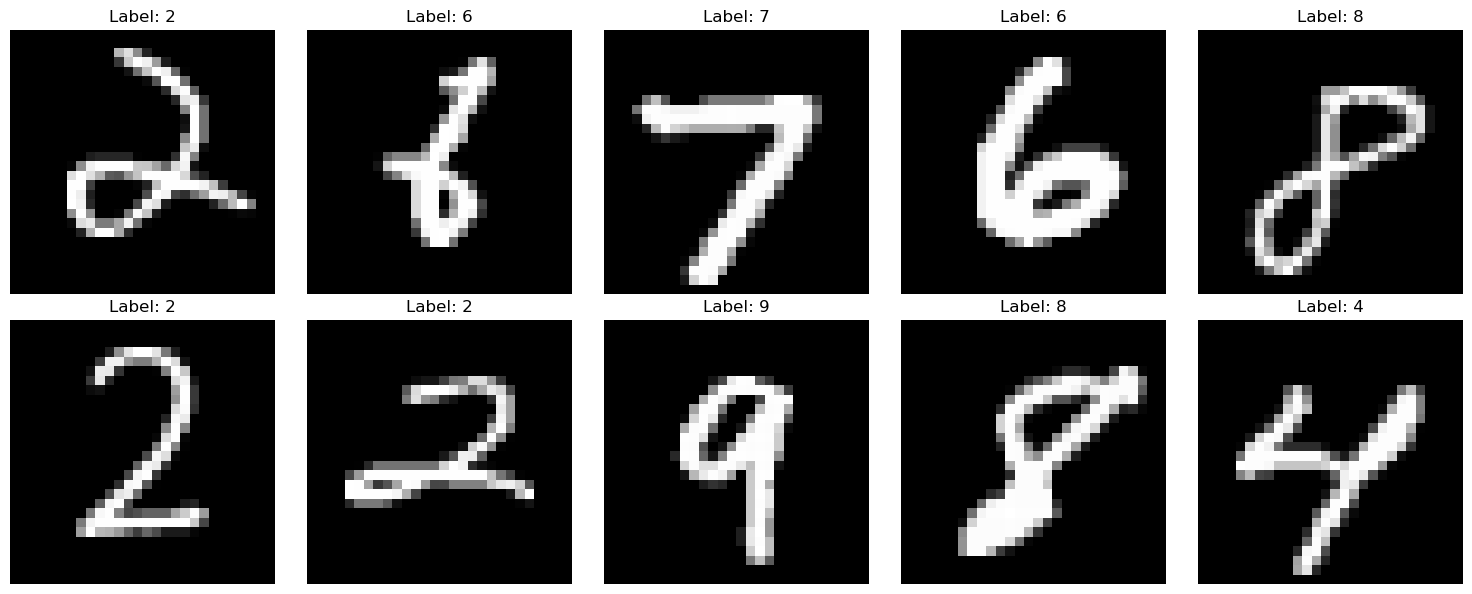

In [ ]:
def plot_examples(dataloader, num_examples=10, cols=5):
    """
    Display examples of images from the dataset in a rectangular format.
    Args:
        dataloader: PyTorch DataLoader containing image data
        num_examples (int): Number of examples to display (default=10)
        cols (int): Number of columns in the display grid (default=5)
    Returns:
        None. Displays a plot of images with their labels.
    Example:
        plot_examples(train_loader, num_examples=15, cols=5)
    """
    examples = enumerate(dataloader)
    batch_idx, (example_data, example_targets) = next(examples)
    
    rows = (num_examples + cols - 1) // cols  # Calcul du nombre de lignes nécessaires
    fig = plt.figure(figsize=(cols * 3, rows * 3))  # Ajuster la taille du graphique
    
    for i in range(num_examples):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(example_data[i][0], cmap='gray')
        plt.title(f'Label: {example_targets[i]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_examples(train_loader, num_examples=10, cols=5)


### Class Distribution

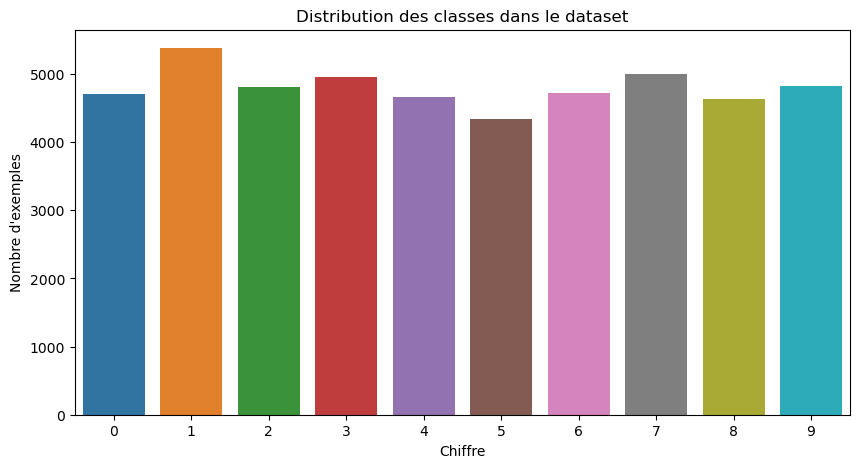

In [ ]:
def plot_class_distribution(dataset):
    """
    Plots the distribution of classes in the given dataset.
    Parameters:
    dataset (list): A list of tuples where each tuple contains an image and its corresponding label.
    Returns:
    None
    """
    labels = [dataset[i][1] for i in range(len(dataset))]
    unique, counts = np.unique(labels, return_counts=True)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=unique, y=counts)
    plt.title('Distribution des classes dans le dataset')
    plt.xlabel('Chiffre')
    plt.ylabel('Nombre d\'exemples')
    plt.show()


plot_class_distribution(train_dataset)

### Data Distribution by Class and Dataset

In [8]:
print("Data distribution by class and dataset:")
print("\nClasses  Training    Validation    Test      Total")
print("-" * 55)

# Get labels 
train_labels = [label for _, label in train_dataset]
val_labels = [label for _, label in val_dataset]
test_labels = [label for _, label in test_dataset]

# Calculate distribution for each class
for i in range(10):
    train_count = sum(1 for label in train_labels if label == i)
    val_count = sum(1 for label in val_labels if label == i)
    test_count = sum(1 for label in test_labels if label == i)
    total = train_count + val_count + test_count
    
    print(f"{i:^7d}  {train_count:^13d}  {val_count:^10d}  {test_count:^8d}  {total:^8d}")

# Print totals
total_train = len(train_labels)
total_val = len(val_labels)
total_test = len(test_labels)
grand_total = total_train + total_val + total_test

print("-" * 55)
print(f"Total   {total_train:^13d}  {total_val:^10d}  {test_count:^8d}  {grand_total:^8d}")

Data distribution by class and dataset:

Classes  Training    Validation    Test      Total
-------------------------------------------------------
   0         4701          1222       980       6903  
   1         5379          1363       1135      7877  
   2         4801          1157       1032      6990  
   3         4960          1171       1010      7141  
   4         4655          1187       982       6824  
   5         4331          1090       892       6313  
   6         4716          1202       958       6876  
   7         5004          1261       1028      7293  
   8         4634          1217       974       6825  
   9         4819          1130       1009      6958  
-------------------------------------------------------
Total       48000        12000       1009     70000  
